1. tính giá trị trung bình của saleprice chỉ sử dụng 400 mẫu. tính độ lệch chuẩn và vẽ biểu đồ hist cho dữ liệu mean dựa vào clt

2. phân tích mối quan hệ giữa saleprice và các thuộc tính kiểu loại, rút ra nhận xét (ít nhất 3 thuộc tính)

3. Phân tích mối quan hệ của saleprice đối với các thuộc tính kiểu số (numerical data), rút ra nhận xét, ít nhất 3 thuộc tính

4. chọn kỹ thuật phù hợp (LabelEncoding và OnehotEncoding để biến đổi các thuộc tính kiểu loại

5. xử lý các dữ liệu nhiễu trong dữ liệu và tính lại hệ số tương quan so với saleprice

# 1. tính giá trị trung bình của saleprice chỉ sử dụng 400 mẫu. tính độ lệch chuẩn và vẽ biểu đồ hist cho dữ liệu mean dựa vào clt

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics as stats
np.set_printoptions(suppress=True,precision = True)
import seaborn as sns
from scipy import stats

In [4]:
hdata = pd.read_csv("house_price.csv")
hdata.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
hdata = hdata.drop(["Id"],axis = 1)

In [13]:
n_sample = 400
random_sample = hdata.sample(n_sample,random_state=1)
random_sample.reset_index(drop=True,inplace=True)
random_sample.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,80.0,12435,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,231500
1,75,RL,60.0,8400,Pave,NaN,Reg,Bnk,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,179500
2,20,RL,NaN,9819,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,122000
3,180,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,12,2007,WD,Normal,84500
4,20,RL,NaN,12160,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,5,2010,COD,Abnorml,142000


In [15]:
random_sample['SalePrice'].describe()

count       400.000000
mean     179344.980000
std       84496.063945
min       35311.000000
25%      125875.000000
50%      160100.000000
75%      210000.000000
max      745000.000000
Name: SalePrice, dtype: float64

In [28]:
mean_hprice = np.mean(random_sample['SalePrice'])
median_hprice = np.median(random_sample['SalePrice'])
max_hprice = np.max(random_sample['SalePrice'])
min_hprice = np.min(random_sample['SalePrice'])
std_hprice = random_sample['SalePrice'].std()

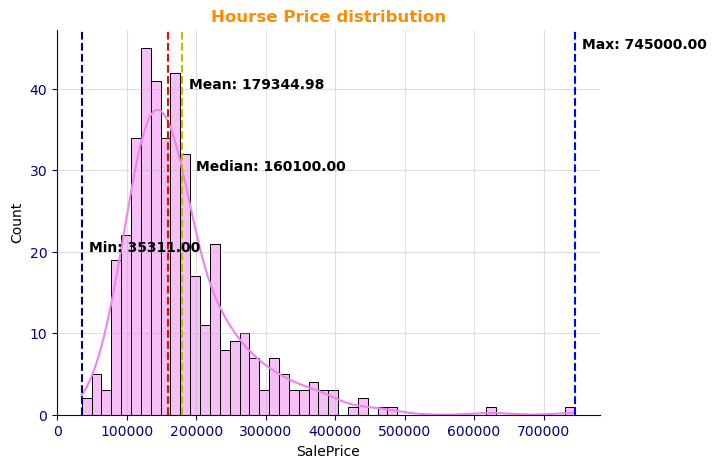

In [103]:
fig, ax = plt.subplots(figsize=(7,5))
fplot = sns.histplot(data=random_sample['SalePrice'],
                     color='violet',ax=ax,bins=50,kde=True)



ax.text(mean_hprice+10000,40,f"Mean: {mean_hprice:0.2f}",weight='bold')
ax.text(median_hprice+40000,30,f"Median: {median_hprice:0.2f}",weight='bold')
ax.text(max_hprice+10000,45,f"Max: {max_hprice:0.2f}",weight='bold')
ax.text(min_hprice+10000,20,f"Min: {min_hprice:0.2f}",weight='bold')

ax.axvline(mean_hprice,linestyle="dashed",color='y')
ax.axvline(median_hprice,linestyle="dashed",color='red')
ax.axvline(max_hprice,linestyle='dashed',color='blue')
ax.axvline(min_hprice,linestyle='dashed',color='navy')

ax.set_title(label="Hourse Price distribution",color='darkorange',weight='bold')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('navy')
ax.spines['bottom'].set_color('navy')

ax.tick_params(axis='both', colors='navy')
plt.grid(alpha=0.4)
plt.show()

In [156]:
# tạo hàm vẽ biểu đồ
def info(ax,value,height,height_set,name,color):
    ax.axvline(value,linestyle='dashed',color=color)
    ax.text(value,height*height_set,f"{name}:{value:0.2f}",color=color,
           weight='bold')

In [157]:
def graph(data):
    fig, ax = plt.subplots(figsize=(7,5))
    fplot= sns.histplot(data,color='violet',bins=20,kde=True)

    info(ax,np.mean(data),25,1,"Mean","red")
    info(ax,np.median(data),25,2/3,"Median","yellow")
    info(ax,np.max(data),25,1.5,"Max","navy")
    info(ax,np.min(data),35,0.2,"Min",'navy')
    
    ax.set_title(label="Hourse Price distribution",color='darkorange',weight='bold')

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_color('navy')
    ax.spines['bottom'].set_color('navy')

    ax.tick_params(axis='both', colors='navy')
    plt.grid(alpha=0.4)
    plt.show()
    

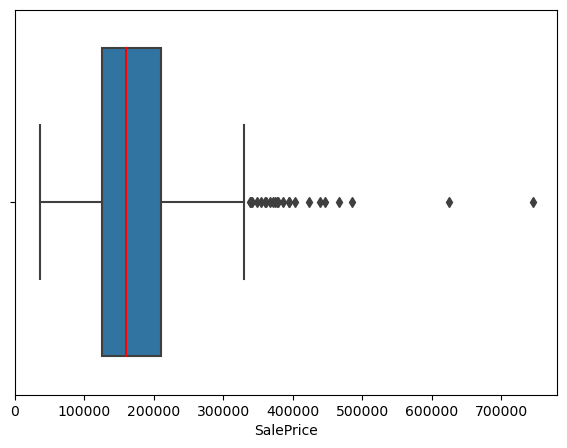

In [158]:
fig,  ax = plt.subplots(figsize=(7,5))
sns.boxplot(ax=ax,x=random_sample['SalePrice'],medianprops={'color':'red'})

plt.show()

In [159]:
# loại bỏ outliers
Q1 = np.quantile(random_sample['SalePrice'],0.25)
Q3 = np.quantile(random_sample['SalePrice'],0.75)
IQR = Q3 - Q1
high_outliers = Q3 + 1.5*IQR
low_outliers = Q1 - 1.5*IQR
print(high_outliers)
print(low_outliers)

336187.5
-312.5


In [160]:
hprice = random_sample["SalePrice"]

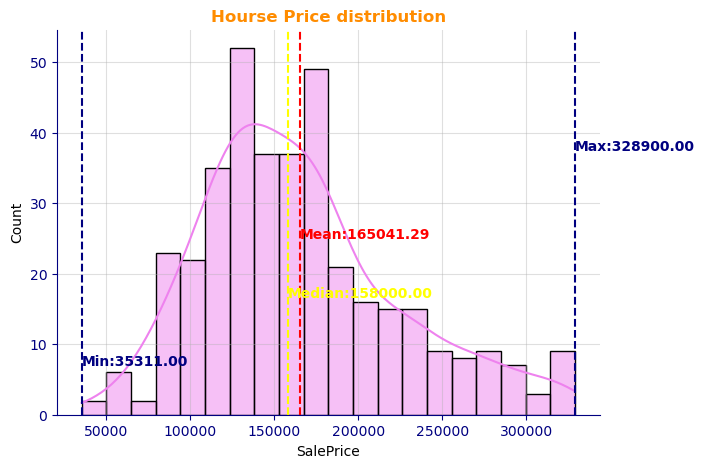

In [161]:
hprice = hprice[hprice<high_outliers]
graph(hprice)

# 3. phân tích tương quan saleprice dựa trên 3 biến kiểu số (numeric features)

In [64]:
# in ra các biến của tập sample
variables = random_sample.columns
variables

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [163]:
numeric_features=random_sample.dtypes[random_sample.dtypes != 'object'].index
numeric_features

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [175]:
random_sample['BedroomAbvGr']

0      3
1      4
2      3
3      1
4      3
      ..
395    2
396    2
397    3
398    4
399    1
Name: BedroomAbvGr, Length: 400, dtype: int64

# GarageArea,BedroomAbvGr , Fireplaces, YearBuilt

# Garage Area

<Axes: xlabel='GarageArea', ylabel='SalePrice'>

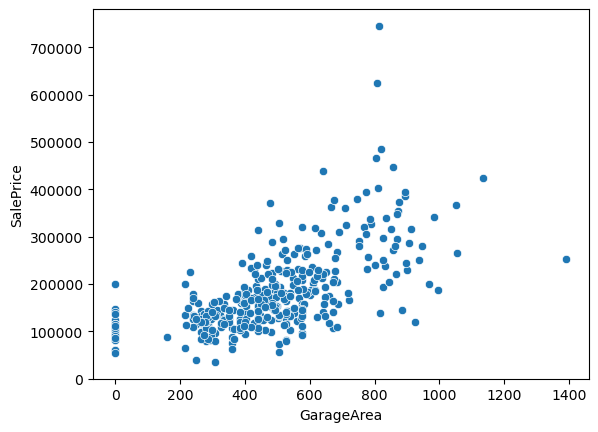

In [177]:
# GarageArea
sns.scatterplot(data=random_sample,x='GarageArea',y='SalePrice')

In [179]:
import ipywidgets as widgets

In [230]:
@widgets.interact(aa=(0,500,10),bb=(40000,700000,5000)) 
def linear_regression(aa=0.001, bb=1, cc='r', show_line=False, text='Linear Regression'):
    xx = np.array([200,1000])
    yy = xx*aa + bb
    sns.scatterplot(data=random_sample,x='GarageArea',y='SalePrice')
    
    plt.title("GarageArea compares with SalePrice")
    plt.xlabel('GarageArea')
    plt.ylabel('SalePrice')
    if show_line:
        sns.lineplot(x=xx, y=yy, color=cc)
    plt.annotate(text, (0, 35))
    
    plt.show()
    plt.close('all')

interactive(children=(IntSlider(value=0, description='aa', max=500, step=10), IntSlider(value=40000, descripti…

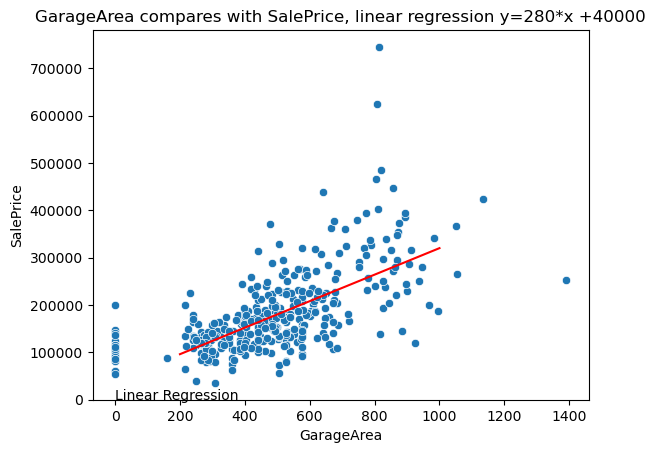

In [200]:
xx = np.array([200,1000])
yy = xx*280 + 40000
sns.scatterplot(data=random_sample,x='GarageArea',y='SalePrice')
    
plt.title("GarageArea compares with SalePrice, linear regression y=280*x +40000")
plt.xlabel('GarageArea')
plt.ylabel('SalePrice')
sns.lineplot(x=xx, y=yy, color='red')
plt.annotate("Linear Regression", (0, 35))
    
plt.show()
plt.close('all')

In [201]:
selected_columns = ['SalePrice', 'GarageArea']
selected_data = random_sample[selected_columns]


correlation_matrix = selected_data.corr()
print(correlation_matrix)

            SalePrice  GarageArea
SalePrice    1.000000    0.635881
GarageArea   0.635881    1.000000


KẾT LUẬN:
Với biểu đồ tương quan scatter và mô hình hồi quy tuyến tính tương đối, ta có thể kết luận rằng sự tương quan giữa SalePrice và GarageArea là tương quan thuận (correlation = 0.636), xét trên điều kiện thực tế thì ta thấy hợp lí, vì Garage Area càng lớn, để được càng nhiều phương tiện=> tăng tính tiện lợi dẫn đến giá nhà tăng theo (0.636 là con số tương đối hợp lí bởi giá nhà còn bị ảnh hưởng đến rất nhiều yếu tố khác)

# Fireplaces 

<Axes: xlabel='SalePrice', ylabel='Fireplaces'>

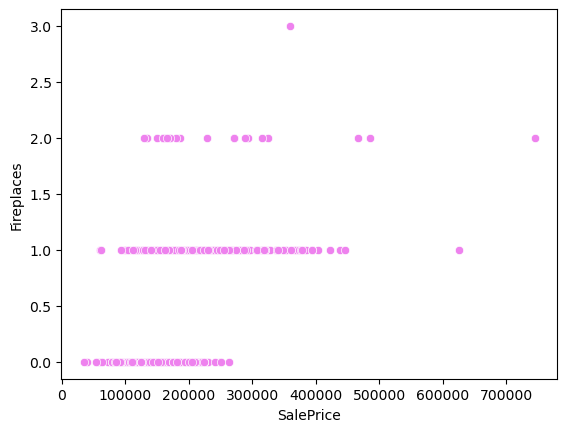

In [188]:
# Fireplaces
sns.scatterplot(data=random_sample,y='Fireplaces',x='SalePrice',color='violet')

In [203]:
correlation_matrix = random_sample[['SalePrice','Fireplaces']].corr()
print(correlation_matrix)

            SalePrice  Fireplaces
SalePrice    1.000000    0.495758
Fireplaces   0.495758    1.000000


**KẾT LUẬN**
Thông qua biểu đồ scatter và correlation rate 0.495758 (<50) không quá thấp, ta chưa thấy được sự tương quan rõ ràng nào giữa biến độc lập Fireplaces và biến phụ thuộc: SalePrices. nhưng xét về mặt logic, nhà có càng có nhiều lò sưởi => nhiều phòng gần tương đương với nhà rộng => ảnh hưởng đến giá nhà, ta có thể nhận thấy rằng khi fireplace = 1, giá nhà có sự tặng hơn rõ so với 0 lò sưởi

# YearBuilt

<Axes: xlabel='YearBuilt', ylabel='SalePrice'>

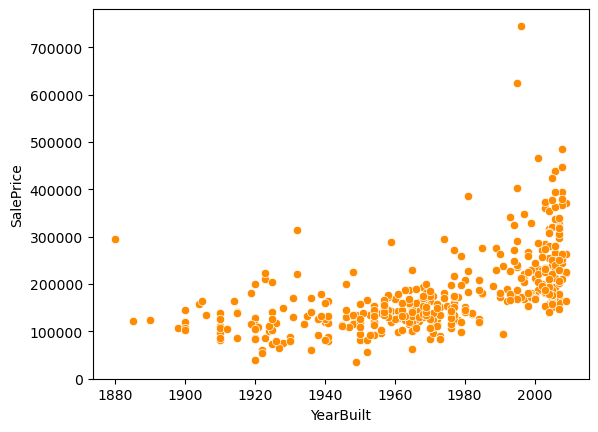

In [172]:
# YearBuilt
sns.scatterplot(data=random_sample,y='SalePrice',x='YearBuilt',
               color='darkorange')

In [228]:
correlation_matrix = random_sample[['YearBuilt','SalePrice']].corr()
print(correlation_matrix)

           YearBuilt  SalePrice
YearBuilt   1.000000   0.557731
SalePrice   0.557731   1.000000


**KẾT LUẬN**
1. QUA BIỂU ĐỒ SCATTER TA CÓ THỂ SUY RA ĐƯỢC KHI NHÀ ĐƯỢC XÂY DỰNG VÀO NHỮNG THỜI GIAN GẦN VỀ SAU NHẤT THÌ GIÁ NHÀ CŨNG TĂNG THEO, ĐÂY LÀ TƯƠNG QUAN TỈ LỆ THUẬN GIỮA BIẾN ĐỘC LẬP YearBuilt VÀ BIẾN PHỤ THUỘC SalePrice.
2. DỰA VÀO CORRELATION MATRIX, TA THẤY HỆ SỐ TƯƠNG QUAN GIỮA HAI BIẾN LÀ XẤP SỈ 0.558 (>0.5) ĐIỀU NÀY CHO THẤY 2 BIẾN NÀY CÓ TƯƠNG QUAN VỚI NHAU RÕ RÀNG

XÉT VỀ LOGIC TA THẤY: HỢP LÝ, VÌ CÓ THỂ KHI NHÀ XÂY ĐÃ LÂU SẼ DẪN ĐẾN XUỐNG CẤP, NÊN NGƯỜI CHỦ MỚI CẦN PHẢI TU SỬA, GIA CÔNG LẠI THÌ MỚI Ở ĐƯỢC DẪN ĐẾN GIÁ NHÀ THẤP, NGƯỢC LẠI NHÀ CÀNG MỚI THÌ GIÁ SẼ CÀNG CAO DO CHẤT LƯỢNG (TƯỜNG, NỀN, MÓNG) CHƯA BỊ XUỐNG CẤP, GIÁ NHÀ CAO

# BedroomAbvGr

<Axes: xlabel='BedroomAbvGr', ylabel='SalePrice'>

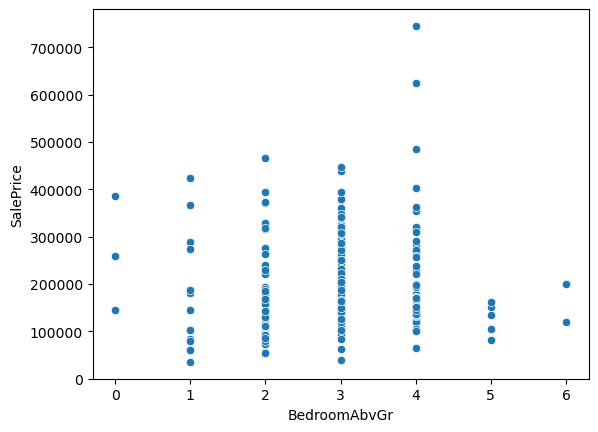

In [176]:
sns.scatterplot(data=random_sample,x='BedroomAbvGr',y='SalePrice')

In [231]:
correlation_matrix = random_sample[['BedroomAbvGr','SalePrice']].corr()
print(correlation_matrix)

              BedroomAbvGr  SalePrice
BedroomAbvGr      1.000000   0.140627
SalePrice         0.140627   1.000000


** KẾT LUẬN**
1. DỰA VÀO CẢ BIỂU ĐỒ SCATTER VÀ HỆ SỐ TƯƠNG QUAN, TA KẾT LUẬN KHÔNG CÓ SỰ TƯƠNG QUAN RÕ RÀNG GIỮA SỐ LƯỢNG PHÒNG NGỦ VÀ GIÁ NHÀ. XÉT VỀ LOGIC, GIÁ NHÀ SẼ BỊ ẢNH HƯỞNG BỞI NHỮNG PROPERTIES CỦA PHÒNG NGỦ CHỨ KHÔNG PHẢI SỐ LƯỢNG, VÍ DỤ NHƯ: DIỆN TÍCH PHÒNG NGỦ, ĐỘ TIỆN NGHI (CÓ TOILET TRONG PHÒNG KHÔNG?) HAY VỊ TRÍ, THIẾT KẾ, V.V

2. ĐỂ CỦNG CỐ KL1, TA CÓ THỂ XÉT KHI SỐ LƯỢNG BEDROOM = 4, DÙ SỐ LƯỢNG LÊN ĐẾN 4 NHƯNG SALEPRICE GIỮA 2,3,4,... CÓ MỘT KHOẢNG GIÁ TRỊ LÀ BẰNG NHAU, VÀ CŨNG LÀ CON SỐ 4 PHÒNG NGỦ NHƯNG GIÁ NHÀ LẠI DAO ĐỘNG VỚI BIÊN ĐỘ RẤT LỚN (100000 ĐẾN >7000000) ĐIỀU NÀY CŨNG CỐ CHO KL1 RẰNG GIÁ NHÀ SẼ PHỤ THUỘC VÀO THUỘC TÍNH CỦA PHÒNG NGỦ HƠN LÀ SỐ LƯỢNG PHÒNG.

# 2. Tương quan giữa saleprice và biến kiểu loại (Categorical features)

In [232]:
categorical_feats = random_sample.dtypes[random_sample.dtypes == 'object'].index
categorical_feats

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [234]:
random_sample['KitchenQual'].describe()

count     400
unique      4
top        TA
freq      215
Name: KitchenQual, dtype: object

In [235]:
random_sample['Heating'].describe()

count      400
unique       3
top       GasA
freq       392
Name: Heating, dtype: object

In [233]:
random_sample['HouseStyle'].describe()

count        400
unique         8
top       1Story
freq         195
Name: HouseStyle, dtype: object

# KitchenQual

<Axes: xlabel='KitchenQual', ylabel='SalePrice'>

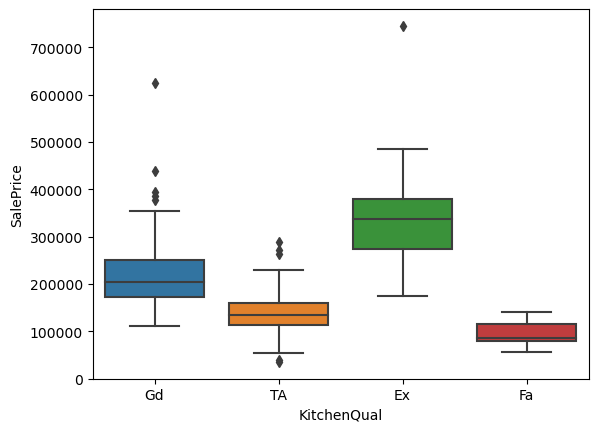

In [238]:
sns.boxplot(data=random_sample,x='KitchenQual',y='SalePrice',palette='tab10')

**KẾT LUẬN**
1. DỰA VÀO BOXPLOT, TA SUY RA ĐƯỢC RẰNG CHẤT LƯỢNG CĂN BẾP CỦA NGÔI NHÀ ĐÓ CÀNG CAO, GIÁ THÀNH CŨNG SẼ TĂNG CAO, ĐÂY LÀ SỰ TƯƠNG QUAN TỈ LỆ THUẬN VÀ THỂ HIỆN RÕ QUA BOXPLOT. KHOẢNG IQR CỦA 4 MỨC CHẤT LƯỢNG LÀ KHÔNG/ ÍT TRÙNG NHAU
2. XÉT VỀ OUTLIERS, TA CÓ THỂ THẤY RẰNG KHÔNG CÓ GÌ ẢNH HƯỞNG QUÁ NHIỀU ĐẾN KẾT LUẬN, XÉT VỀ CĂN BẾP (TA: TRUNG BÌNH, Gd: GOOD) TA THẤY, KHOẢNG GIÁ TRỊ OUTLIER CỦA TA VẪN NẰM TRONG VÒNG GIÁ NHÀ CỦA Gd, KHÔNG VƯỢT QUA ĐƯỢC

XÉT VỀ LOGIC: HỢP LÍ, VÌ CĂN BẾP LÀ VÔ CÙNG QUAN TRỌNG TRONG CĂN NHÀ, LÀ NƠI SINH HOẠT PHỔ BIẾN NÊN CĂN BẾP CHẤT LƯỢNG CAO THÌ ẢNH HƯỞNG KHÁ LỚN ĐẾN GIÁ NHÀ LÀ CHUYỆN HỢP LÍ

# Heating

<Axes: xlabel='Heating', ylabel='SalePrice'>

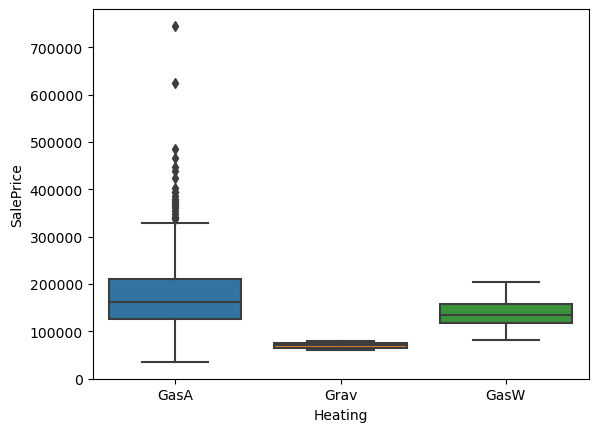

In [240]:
sns.boxplot(data=random_sample,x='Heating',y='SalePrice')

# HouseStyle

<Axes: xlabel='HouseStyle', ylabel='SalePrice'>

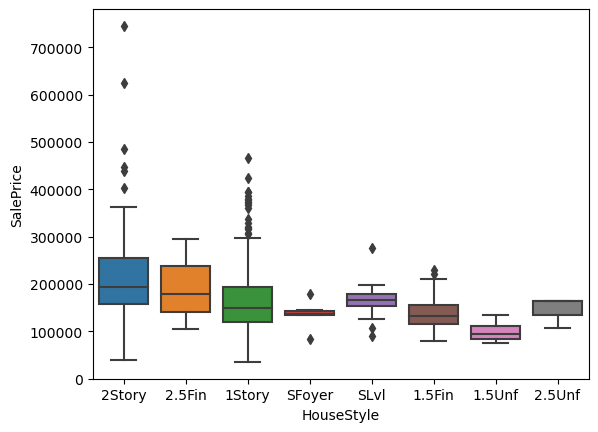

In [242]:
sns.boxplot(data=random_sample,x='HouseStyle',y='SalePrice')